#**DATA PREPROCESSING**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#Importing the required libraries
import pandas as pd
import numpy as np
import seaborn as sns
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import accuracy_score, classification_report
from sklearn.metrics import ConfusionMatrixDisplay
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
pwd

'/content'

In [ ]:
#Loading the dataset
path='/content/drive/MyDrive/csv_result_caesarian.csv'
#cdata=pd.read_csv("csv_result-caesarian.csv")
cdata=pd.read_csv(path)


In [ ]:
cdata.head()

,id,'Age','Delivery,'Delivery.1,'Blood,'Heart,Caesarian
0,1,22,1,0,2,0,0
1,2,26,2,0,1,0,1
2,3,26,2,1,1,0,0
3,4,28,1,0,2,0,0
4,5,22,2,0,1,0,1


In [ ]:
#Checking the dimensions of the dataset
cdata.shape

(80, 7)

In [ ]:
#Checking for Null values in the dataset
cdata.isnull().sum().sort_values(ascending=False)

id             0
'Age'          0
'Delivery      0
'Delivery.1    0
'Blood         0
'Heart         0
Caesarian      0
dtype: int64

In [ ]:
#Checking the datatype of the various columns present in the dataset
cdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 80 entries, 0 to 79
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   id           80 non-null     int64
 1   'Age'        80 non-null     int64
 2   'Delivery    80 non-null     int64
 3   'Delivery.1  80 non-null     int64
 4   'Blood       80 non-null     int64
 5   'Heart       80 non-null     int64
 6   Caesarian    80 non-null     int64
dtypes: int64(7)
memory usage: 4.5 KB


In [ ]:
#Checking the column names
cdata.columns

Index(['id', ''Age'', ''Delivery', ''Delivery.1', ''Blood', ''Heart',
       'Caesarian'],
      dtype='object')

In [ ]:
#Dropping the id column from the dataset
data=cdata.drop('id',axis=1)

In [ ]:
#Re-naming the columns
data.rename(columns = {"'Age'":'Age',"'Delivery":'Delivery Number',"'Delivery.1":'Delivery Time',"'Blood":'Blood Pressure',"'Heart":'Heart Problem'},inplace = True)

#**EXPLORATORY DATA ANALYSIS**

In [ ]:
#To check the column names
data.columns

Index(['Age', 'Delivery Number', 'Delivery Time', 'Blood Pressure',
       'Heart Problem', 'Caesarian'],
      dtype='object')

In [ ]:
data.head()

,Age,Delivery Number,Delivery Time,Blood Pressure,Heart Problem,Caesarian
0,22,1,0,2,0,0
1,26,2,0,1,0,1
2,26,2,1,1,0,0
3,28,1,0,2,0,0
4,22,2,0,1,0,1


In [ ]:
data['Caesarian'].value_counts()

1    46
0    34
Name: Caesarian, dtype: int64

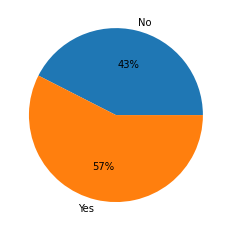

In [ ]:
lables=['No','Yes']
var=data.groupby('Caesarian')['Caesarian'].count()
plt.pie(var,labels=lables,autopct='%.0f%%')
plt.show()

In [ ]:
data['Delivery Time'].value_counts()

0    46
1    34
Name: Delivery Time, dtype: int64

In [ ]:
data.groupby("Delivery Time").agg({"Caesarian":"count"})

,Caesarian
Delivery Time,
0,46
1,34


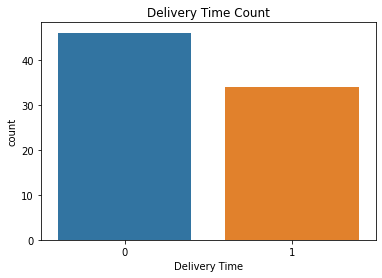

In [ ]:
lables=['Timely','Premature','Latecomer']
sns.countplot(x ='Delivery Time', data = data)
plt.title("Delivery Time Count")
plt.show()

<AxesSubplot:xlabel='Delivery Time'>

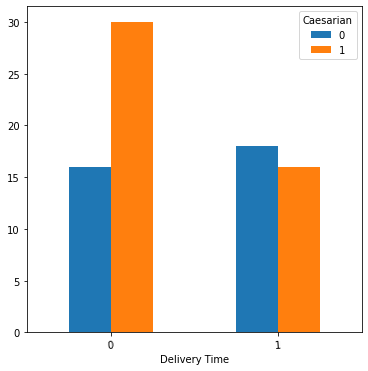

In [ ]:
CrosstabResult=pd.crosstab(index=data['Delivery Time'],columns=data['Caesarian'])
CrosstabResult.plot.bar(figsize=(6,6), rot=4) 

In [ ]:
data['Blood Pressure'].value_counts()

1    40
2    20
0    20
Name: Blood Pressure, dtype: int64

In [ ]:
data.groupby("Blood Pressure").agg({"Caesarian":"count"})

,Caesarian
Blood Pressure,
0,20
1,40
2,20


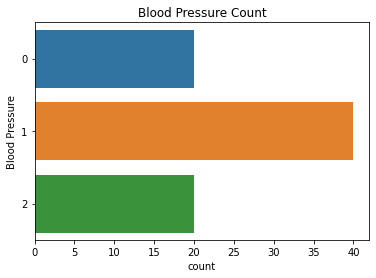

In [ ]:
sns.countplot(y ='Blood Pressure', data = data)
plt.title("Blood Pressure Count")
plt.show()

/usr/local/lib/python3.8/dist-packages/seaborn/categorical.py:3717: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


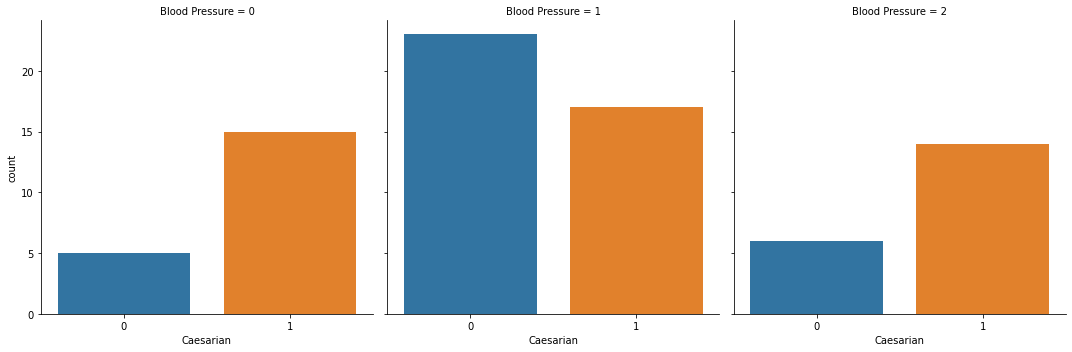

In [ ]:
sns.factorplot(x='Caesarian', col='Blood Pressure', kind='count', data=data)

In [ ]:
data['Heart Problem'].value_counts()

0    50
1    30
Name: Heart Problem, dtype: int64

In [ ]:
data.groupby("Heart Problem").agg({"Caesarian":"count"})

,Caesarian
Heart Problem,
0,50
1,30


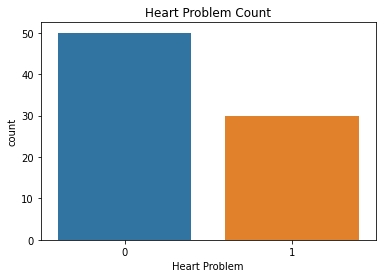

In [ ]:
sns.countplot(x ='Heart Problem', data = data)
plt.title("Heart Problem Count")
plt.show()

/usr/local/lib/python3.8/dist-packages/seaborn/categorical.py:3717: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


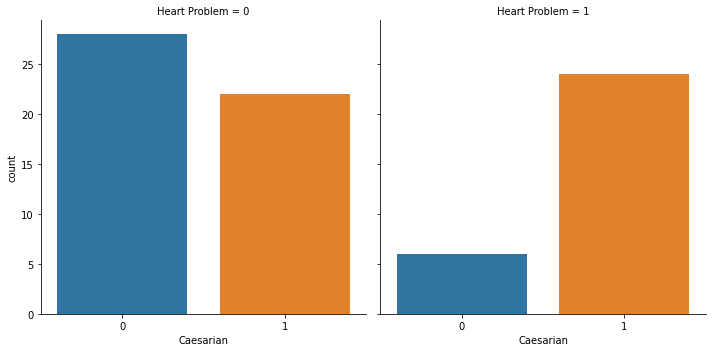

In [ ]:
sns.factorplot(x='Caesarian', col='Heart Problem', kind='count', data=data)

In [ ]:
data['Delivery Number'].value_counts()

1    41
2    27
3    10
4     2
Name: Delivery Number, dtype: int64

In [ ]:
data.groupby("Delivery Number").agg({"Caesarian":"count"})

,Caesarian
Delivery Number,
1,41
2,27
3,10
4,2


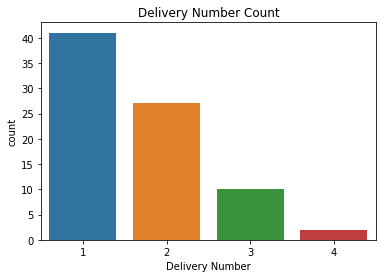

In [ ]:
sns.countplot(x ='Delivery Number', data = data)
plt.title("Delivery Number Count")
plt.show()

<AxesSubplot:xlabel='Delivery Number'>

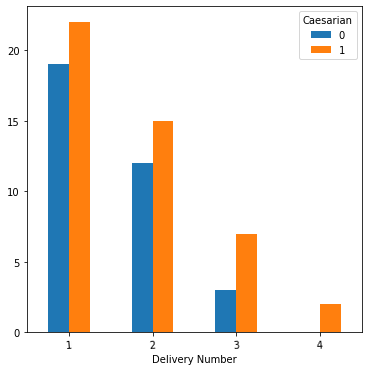

In [ ]:
CrosstabResult=pd.crosstab(index=data['Delivery Number'],columns=data['Caesarian'])
CrosstabResult.plot.bar(figsize=(6,6), rot=4) 

<AxesSubplot:>

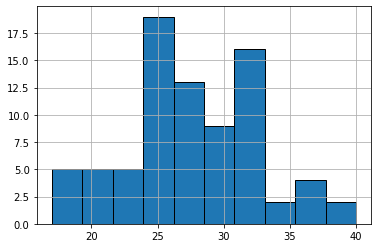

In [ ]:
data["Age"].hist(edgecolor = "black")

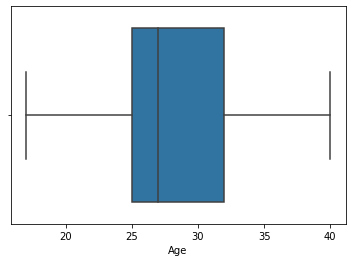

In [ ]:
sns.boxplot(x = data["Age"]);

In [ ]:
print("Maximum Age: " + str(data["Age"].max()) + " Minimum Age: " + str(data["Age"].min()))

Maximum Age: 40 Minimum Age: 17


In [ ]:
data.groupby("Caesarian").agg({"Age":"max"})

,Age
Caesarian,
0,36
1,40


In [ ]:
data.groupby("Caesarian").agg({"Age":"min"})

,Age
Caesarian,
0,18
1,17


<AxesSubplot:>

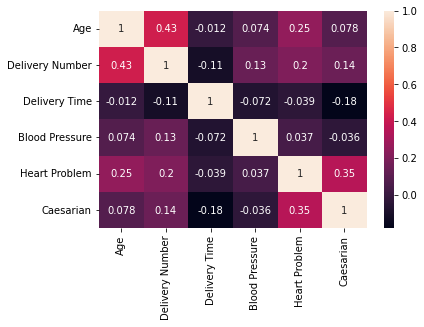

In [ ]:
sns.heatmap(data.corr(),annot=True)

#**BUILDING CLASSIFICATION MODELS**

In [ ]:
#Assigning dependent and independent variables to y and x respectively
y = data["Caesarian"]
x = data.drop("Caesarian",axis=1)

In [ ]:
# Splitting the dataset, 80% for training and 20% for testing
x_train, x_test, y_train, y_test= train_test_split(x, y, test_size=0.2, random_state=42)

Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
from sklearn.metrics import classification_report

In [ ]:
logreg = LogisticRegression(max_iter=1000)

In [ ]:
logmodel=logreg.fit(x_train,y_train)

In [ ]:
logmodel.score(x_train,y_train)

0.640625

In [ ]:
logpredict=logmodel.predict(x_test)

In [ ]:
from sklearn import metrics
print('Model Accuracy: ',metrics.accuracy_score(y_test,logpredict))

Model Accuracy:  0.8125


In [ ]:
print(classification_report(y_test,logpredict))

              precision    recall  f1-score   support

           0       1.00      0.50      0.67         6
           1       0.77      1.00      0.87        10

    accuracy                           0.81        16
   macro avg       0.88      0.75      0.77        16
weighted avg       0.86      0.81      0.79        16



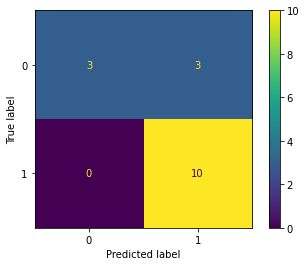

In [ ]:
ConfusionMatrixDisplay.from_predictions(y_test,logpredict)


Decision Tree Classifier

In [ ]:
from sklearn.tree import DecisionTreeClassifier  

In [ ]:
dtree=DecisionTreeClassifier()

In [ ]:
dtreemodel=dtree.fit(x_train,y_train)

In [ ]:
dtreemodel.score(x_train,y_train)

0.96875

In [ ]:
dtreepredict=dtreemodel.predict(x_test)

In [ ]:
print('Accuracy of model is',metrics.accuracy_score(y_test,dtreepredict))

Accuracy of model is 0.4375


In [ ]:
print(classification_report(y_test,dtreepredict))

              precision    recall  f1-score   support

           0       0.33      0.50      0.40         6
           1       0.57      0.40      0.47        10

    accuracy                           0.44        16
   macro avg       0.45      0.45      0.44        16
weighted avg       0.48      0.44      0.44        16



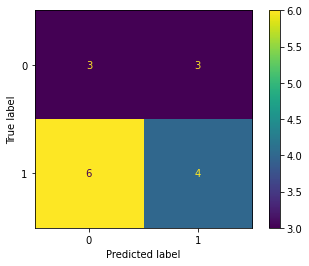

In [ ]:
ConfusionMatrixDisplay.from_predictions(y_test,dtreepredict)

Random Forest Classifier

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
rfc = RandomForestClassifier(n_estimators=1000)

In [ ]:
rfmodel = rfc.fit(x_train,y_train)

In [ ]:
rfmodel.score(x_train,y_train)

0.96875

In [ ]:
rfpredict=rfmodel.predict(x_test)

In [ ]:
rfpredict

array([1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1])

In [ ]:
print(classification_report(y_test,rfpredict))

              precision    recall  f1-score   support

           0       1.00      0.33      0.50         6
           1       0.71      1.00      0.83        10

    accuracy                           0.75        16
   macro avg       0.86      0.67      0.67        16
weighted avg       0.82      0.75      0.71        16



In [ ]:
print('Accuracy of model is',metrics.accuracy_score(y_test,rfpredict))

Accuracy of model is 0.75


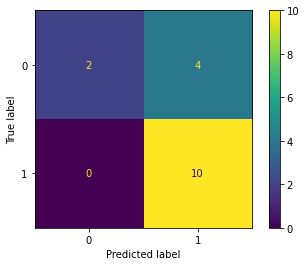

In [ ]:
ConfusionMatrixDisplay.from_predictions(y_test,rfpredict)

Support Vector Machine

In [ ]:
from sklearn.svm import SVC

In [ ]:
svm = SVC()

In [ ]:
svmmodel = svm.fit(x_train,y_train)

In [ ]:
svmmodel.score(x_train,y_train)

0.5625

In [ ]:
svmpredict=svmmodel.predict(x_test)

In [ ]:
print('Accuracy of model is',metrics.accuracy_score(y_test,svmpredict))

Accuracy of model is 0.625


In [ ]:
print(classification_report(y_test,svmpredict))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         6
           1       0.62      1.00      0.77        10

    accuracy                           0.62        16
   macro avg       0.31      0.50      0.38        16
weighted avg       0.39      0.62      0.48        16



/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


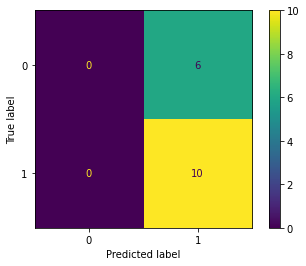

In [ ]:
ConfusionMatrixDisplay.from_predictions(y_test,svmpredict)

Gradient Boosting Classifier

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier

In [ ]:
gbc = GradientBoostingClassifier(n_estimators=100)

In [ ]:
gbmodel = gbc.fit(x_train,y_train)

In [ ]:
gbmodel.score(x_train,y_train)

0.9375

In [ ]:
gbpredict = gbmodel.predict(x_test)

In [ ]:
print('Accuracy of model is',metrics.accuracy_score(y_test,gbpredict))

Accuracy of model is 0.625


In [ ]:
print(classification_report(y_test,gbpredict))

              precision    recall  f1-score   support

           0       0.50      0.33      0.40         6
           1       0.67      0.80      0.73        10

    accuracy                           0.62        16
   macro avg       0.58      0.57      0.56        16
weighted avg       0.60      0.62      0.60        16



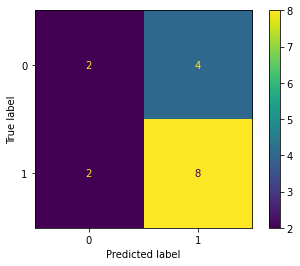

In [ ]:
ConfusionMatrixDisplay.from_predictions(y_test,gbpredict)

Bagging

In [ ]:
from sklearn.ensemble import BaggingClassifier

In [ ]:
baggingc = BaggingClassifier(n_estimators=400)

In [ ]:
bmodel = baggingc.fit(x_train,y_train)

In [ ]:
bmodel.score(x_train,y_train)

0.96875

In [ ]:
bpredict = bmodel.predict(x_test)

In [ ]:
print('Accuracy of model is',metrics.accuracy_score(y_test,bpredict))

Accuracy of model is 0.75


In [ ]:
print(classification_report(y_test,bpredict))

              precision    recall  f1-score   support

           0       0.75      0.50      0.60         6
           1       0.75      0.90      0.82        10

    accuracy                           0.75        16
   macro avg       0.75      0.70      0.71        16
weighted avg       0.75      0.75      0.74        16



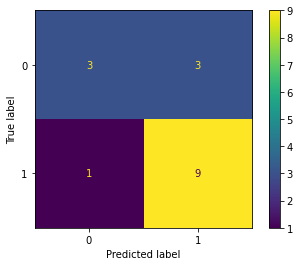

In [ ]:
ConfusionMatrixDisplay.from_predictions(y_test,bpredict)

KNN Classifier

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
knn = KNeighborsClassifier(n_neighbors=3)

In [ ]:
knnmodel = knn.fit(x_train,y_train)

In [ ]:
knnmodel.score(x_train,y_train)

0.734375

In [ ]:
knnpredict = knnmodel.predict(x_test)

In [ ]:
print('Model Accuracy:',metrics.accuracy_score(y_test,knnpredict))

Model Accuracy: 0.625


In [ ]:
print(classification_report(y_test,knnpredict))

              precision    recall  f1-score   support

           0       0.50      0.67      0.57         6
           1       0.75      0.60      0.67        10

    accuracy                           0.62        16
   macro avg       0.62      0.63      0.62        16
weighted avg       0.66      0.62      0.63        16



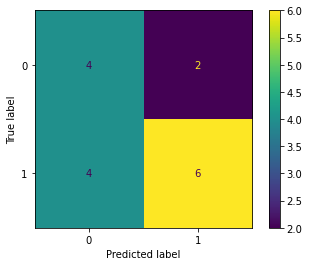

In [ ]:
ConfusionMatrixDisplay.from_predictions(y_test,knnpredict)

In [ ]:
k_list = list(range(1,30))
k_values = dict(n_neighbors=k_list)
print(k_values.keys()),
print(k_values.values())
from sklearn.model_selection import GridSearchCV
grid = GridSearchCV(knn, k_values, cv=5, scoring='accuracy')
grid
grid.fit(x,y)
grid.cv_results_
for key in grid.cv_results_.keys():
  print(key) 
grid_table = pd.DataFrame(grid.cv_results_)
grid_table.head()
grid_table_rank = grid_table[['params','mean_test_score','std_test_score','rank_test_score']].loc[grid_table['rank_test_score']==1].sort_values(by='std_test_score', ascending=True)
grid_table_rank
print("The best value of k = {} with {} of accuracy.".format(grid.best_params_,grid.best_score_))
print("The best classifier is: {}".format(grid.best_estimator_))

dict_keys(['n_neighbors'])
dict_values([[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29]])
mean_fit_time
std_fit_time
mean_score_time
std_score_time
param_n_neighbors
params
split0_test_score
split1_test_score
split2_test_score
split3_test_score
split4_test_score
mean_test_score
std_test_score
rank_test_score
The best value of k = {'n_neighbors': 11} with 0.6 of accuracy.
The best classifier is: KNeighborsClassifier(n_neighbors=11)


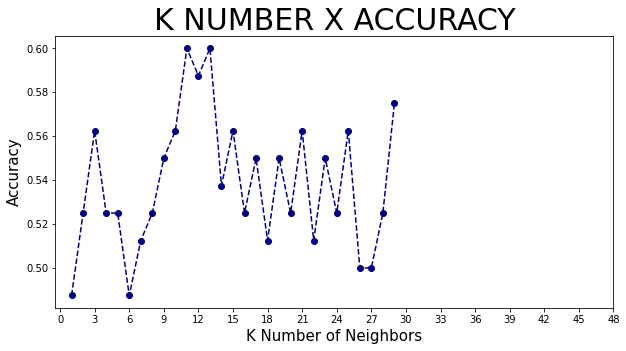

In [ ]:
graphic = grid.cv_results_['mean_test_score']
graphic

plt.figure(figsize=(10,5))
plt.plot(k_list,graphic,color='navy',linestyle='dashed',marker='o')
plt.xlabel('K Number of Neighbors', fontdict={'fontsize': 15})
plt.ylabel('Accuracy', fontdict={'fontsize': 15})
plt.title('K NUMBER X ACCURACY', fontdict={'fontsize': 30})
plt.xticks(range(0,50,3),)
#plt.xaxis.set_major_locator(MultipleLocator(3))
plt.show()

Boosting

In [ ]:
from sklearn.ensemble import AdaBoostClassifier

In [ ]:
abc = AdaBoostClassifier(n_estimators=1000,random_state=42)

In [ ]:
abcmodel = abc.fit(x_train,y_train)

In [ ]:
abcmodel.score(x_train,y_train)

0.78125

In [ ]:
abcpredict = abcmodel.predict(x_test)

In [ ]:
print('Model Accuracy:',metrics.accuracy_score(y_test,abcpredict))

Model Accuracy: 0.625


In [ ]:
print(classification_report(y_test,abcpredict))

              precision    recall  f1-score   support

           0       0.50      0.33      0.40         6
           1       0.67      0.80      0.73        10

    accuracy                           0.62        16
   macro avg       0.58      0.57      0.56        16
weighted avg       0.60      0.62      0.60        16



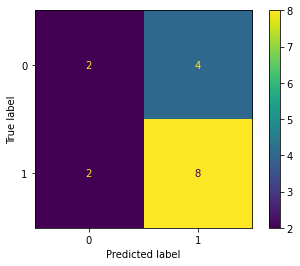

In [ ]:
ConfusionMatrixDisplay.from_predictions(y_test,abcpredict)

In [ ]:
from xgboost import XGBClassifier

In [ ]:
xgb = XGBClassifier(n_estimators=1000)

In [ ]:
xgbmodel = xgb.fit(x_train,y_train)

In [ ]:
from sklearn.metrics import accuracy_score, classification_report

In [ ]:
xgbmodel.score(x_train,y_train)

0.921875

In [ ]:
xgbpredict = xgbmodel.predict(x_test)

In [ ]:
print('Model Accuracy:',metrics.accuracy_score(y_test,xgbpredict))

Model Accuracy: 0.625


In [ ]:
print(classification_report(y_test,xgbpredict))

              precision    recall  f1-score   support

           0       0.50      0.50      0.50         6
           1       0.70      0.70      0.70        10

    accuracy                           0.62        16
   macro avg       0.60      0.60      0.60        16
weighted avg       0.62      0.62      0.62        16



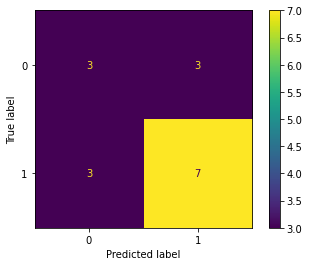

In [ ]:
ConfusionMatrixDisplay.from_predictions(y_test,xgbpredict)

Artificial Neural Network

In [ ]:
tf.random.set_seed(42)

# STEP 1: Creating the model
model= tf.keras.Sequential([
                            tf.keras.layers.Dense(5, activation='relu'),
                            tf.keras.layers.Dense(2, activation='relu'),
                            tf.keras.layers.Dense(1, activation='sigmoid')
])

# STEP 2: Compiling the model
model.compile(loss= tf.keras.losses.binary_crossentropy,
              optimizer= tf.keras.optimizers.SGD(lr=0.01),#Adam or SGD
              metrics= [tf.keras.metrics.BinaryAccuracy(name='accuracy'),
                        tf.keras.metrics.Precision(name='precision'),
                        tf.keras.metrics.Recall(name='a=recall')
              ]
              )

# STEP 3: Fiting the model
history= model.fit(x_train, y_train, epochs=1000)

Epoch 1/1000
2/2 [==============================] - 1s 18ms/step - loss: 0.6858 - accuracy: 0.5000 - precision: 0.5455 - a=recall: 0.6667
Epoch 2/1000
2/2 [==============================] - 0s 8ms/step - loss: 0.6842 - accuracy: 0.5469 - precision: 0.5686 - a=recall: 0.8056
Epoch 3/1000
2/2 [==============================] - 0s 19ms/step - loss: 0.6828 - accuracy: 0.5469 - precision: 0.5574 - a=recall: 0.9444
Epoch 4/1000
2/2 [==============================] - 0s 10ms/step - loss: 0.6820 - accuracy: 0.5469 - precision: 0.5574 - a=recall: 0.9444
Epoch 5/1000
2/2 [==============================] - 0s 9ms/step - loss: 0.6864 - accuracy: 0.5781 - precision: 0.5714 - a=recall: 1.0000
Epoch 6/1000
2/2 [==============================] - 0s 12ms/step - loss: 0.6831 - accuracy: 0.5781 - precision: 0.5714 - a=recall: 1.0000
Epoch 7/1000
2/2 [==============================] - 0s 10ms/step - loss: 0.6817 - accuracy: 0.5781 - precision: 0.5714 - a=recall: 1.0000
Epoch 8/1000
2/2 [==================